# Proyecto Salud Mental y Tasas de Suicidios

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import statsmodels.api as sm
import math

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

### Cargar datasets

In [7]:
df_2015 = pd.read_csv('./world-happiness/2015.csv')
df_2016 = pd.read_csv('./world-happiness/2016.csv')
df_2017 = pd.read_csv('./world-happiness/2017.csv')
df_2018 = pd.read_csv('./world-happiness/2018.csv')
df_2019 = pd.read_csv('./world-happiness/2019.csv')

In [8]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Preparar dataset 

In [9]:
df_2015_temp = df_2015.filter(['Happiness Rank', 'Country', 'Region','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 
                        'Happiness Score' ])
df_2015_temp.insert(0, "Year", 2015)
df_2016_temp = df_2016.filter(['Happiness Rank','Country', 'Region','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity',
                        'Happiness Score'])
df_2016_temp.insert(0, "Year", 2016)
df_2017.rename(columns = {'Happiness.Rank':'Happiness Rank',
                          'Happiness.Score':'Happiness Score',
                          'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
                          'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                          'Trust..Government.Corruption.' : 'Trust (Government Corruption)',
                           }, inplace = True)
df_2017_temp = df_2017.filter(['Happiness Rank','Country','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity',
                        'Happiness Score'])
df_2017_temp.insert(0, "Year", 2017)
df_2018.rename(columns = {'Overall rank' : 'Happiness Rank',
                          'Country or region' : 'Country',
                          'Score' : 'Happiness Score',
                          'Social support' : 'Family',
                          'GDP per capita' : 'Economy (GDP per Capita)',
                          'Healthy life expectancy' : 'Health (Life Expectancy)',
                          'Freedom to make life choices' :'Freedom',
                          'Perceptions of corruption' : 'Trust (Government Corruption)'
                          }, inplace = True)
df_2018_temp = df_2018.filter(['Happiness Rank','Country','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity',
                        'Happiness Score'])
df_2018_temp.insert(0, "Year", 2018)
df_2019.rename(columns = {'Overall rank' : 'Happiness Rank',
                          'Country or region' : 'Country',
                          'Score' : 'Happiness Score',
                          'Social support' : 'Family',
                          'GDP per capita' : 'Economy (GDP per Capita)',
                          'Healthy life expectancy' : 'Health (Life Expectancy)',
                          'Freedom to make life choices' :'Freedom',
                          'Perceptions of corruption' : 'Trust (Government Corruption)'
                          }, inplace = True)
df_2019_temp = df_2019.filter(['Happiness Rank','Country','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity',
                        'Happiness Score'])
df_2019_temp.insert(0, "Year", 2019)

In [10]:
df_2019_temp.head()

,Year,Happiness Rank,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2019,1,Finland,1.340,1.587,0.986,0.596,0.393,0.153,7.769
1,2019,2,Denmark,1.383,1.573,0.996,0.592,0.410,0.252,7.600
2,2019,3,Norway,1.488,1.582,1.028,0.603,0.341,0.271,7.554
3,2019,4,Iceland,1.380,1.624,1.026,0.591,0.118,0.354,7.494
4,2019,5,Netherlands,1.396,1.522,0.999,0.557,0.298,0.322,7.488


In [11]:
total_df = [len(df_2015_temp),len(df_2016_temp),len(df_2017_temp),len(df_2018_temp),len(df_2019_temp)]
print(sum(total_df)/len(total_df))

156.4


En promedio por dataset se encuentran 156.4 países, los cuales son el 80% de los países del mundo

### Merge de las tablas

In [12]:
df_2017_temp = df_2017_temp.merge(df_2016_temp,left_on = 'Country', right_on = 'Country', how = 'inner')
df_2018_temp = df_2018_temp.merge(df_2016_temp,left_on = 'Country', right_on = 'Country', how = 'inner')
df_2019_temp = df_2019_temp.merge(df_2015_temp,left_on = 'Country', right_on = 'Country', how = 'inner')

df_2017_temp.drop(columns = ['Year_y', 'Happiness Rank_y','Economy (GDP per Capita)_y',
       'Family_y', 'Health (Life Expectancy)_y', 'Freedom_y',
       'Trust (Government Corruption)_y', 'Generosity_y', 'Happiness Score_y'], inplace = True)
df_2018_temp.drop(columns = ['Year_y','Happiness Rank_y','Economy (GDP per Capita)_y',
       'Family_y', 'Health (Life Expectancy)_y', 'Freedom_y','Year_y',
       'Trust (Government Corruption)_y', 'Generosity_y', 'Happiness Score_y'], inplace = True)
df_2019_temp.drop(columns = ['Year_y', 'Happiness Rank_y','Economy (GDP per Capita)_y',
       'Family_y', 'Health (Life Expectancy)_y', 'Freedom_y',
       'Trust (Government Corruption)_y', 'Generosity_y', 'Happiness Score_y'], inplace = True)

df_2017_temp.rename(columns = {'Year_x' : 'Year',
                          'Happiness Rank_x' : 'Happiness Rank',
                          'Happiness Score_x':'Happiness Score',
                          'Family_x':'Family',
                          'Economy (GDP per Capita)_x':'Economy (GDP per Capita)',
                          'Health (Life Expectancy)_x': 'Health (Life Expectancy)',
                          'Freedom_x' : 'Freedom',
                          'Trust (Government Corruption)_x': 'Trust (Government Corruption)',
                          'Generosity_x':'Generosity'
                          }, inplace = True)
df_2018_temp.rename(columns = {'Year_x' : 'Year',
                          'Happiness Rank_x' : 'Happiness Rank',
                          'Happiness Score_x':'Happiness Score',
                          'Family_x':'Family',
                          'Economy (GDP per Capita)_x':'Economy (GDP per Capita)',
                          'Health (Life Expectancy)_x': 'Health (Life Expectancy)',
                          'Freedom_x' : 'Freedom',
                          'Trust (Government Corruption)_x': 'Trust (Government Corruption)',
                          'Generosity_x':'Generosity'
                          }, inplace = True)
df_2019_temp.rename(columns = {'Year_x' : 'Year',
                          'Happiness Rank_x' : 'Happiness Rank',
                          'Happiness Score_x':'Happiness Score',
                          'Family_x':'Family',
                          'Economy (GDP per Capita)_x':'Economy (GDP per Capita)',
                          'Health (Life Expectancy)_x': 'Health (Life Expectancy)',
                          'Freedom_x' : 'Freedom',
                          'Trust (Government Corruption)_x': 'Trust (Government Corruption)',
                          'Generosity_x':'Generosity'
                          }, inplace = True)

df_2015_temp = df_2015.filter(['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank'])
df_2016_temp = df_2016.filter(['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank'])
df_2017_temp = df_2017_temp.filter(['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank'])
df_2018_temp = df_2018_temp.filter(['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank'])
df_2019_temp = df_2019_temp.filter(['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank'])

df_2015_temp.insert(0, "Year", 2015)
df_2016_temp.insert(0, "Year", 2016)

df_final = pd.concat([df_2015_temp,df_2016_temp,df_2017_temp,df_2018_temp,df_2019_temp], 
                     sort = False, ignore_index=True)

print(df_final)

     Year                   Country                           Region  \
0    2015               Switzerland                   Western Europe   
1    2015                   Iceland                   Western Europe   
2    2015                   Denmark                   Western Europe   
3    2015                    Norway                   Western Europe   
4    2015                    Canada                    North America   
..    ...                       ...                              ...   
760  2019                     Yemen  Middle East and Northern Africa   
761  2019                    Rwanda               Sub-Saharan Africa   
762  2019                  Tanzania               Sub-Saharan Africa   
763  2019               Afghanistan                    Southern Asia   
764  2019  Central African Republic               Sub-Saharan Africa   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0

### Análisis exploratorio

**Datos estadísiticos de dataset**

In [27]:
df_final.describe()

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
count,765.000000,765.000000,765.000000,765.000000,765.000000,764.000000,765.000000,765.000000,765.000000
mean,2016.968627,0.920905,1.080035,0.616014,0.411172,0.125622,0.218690,5.393793,78.206536
std,1.417563,0.402757,0.326332,0.244228,0.153349,0.106305,0.123212,1.122498,45.127298
min,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.839000,1.000000
25%,2016.000000,0.620000,0.869080,0.449000,0.309410,0.054000,0.129762,4.513000,39.000000
50%,2017.000000,0.985000,1.123236,0.649547,0.431660,0.090405,0.201964,5.332000,78.000000
75%,2018.000000,1.238000,1.330000,0.808000,0.531311,0.155313,0.279920,6.199000,117.000000
max,2019.000000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,7.769000,158.000000


**Correlación entre las variables, columnas, del dataset**

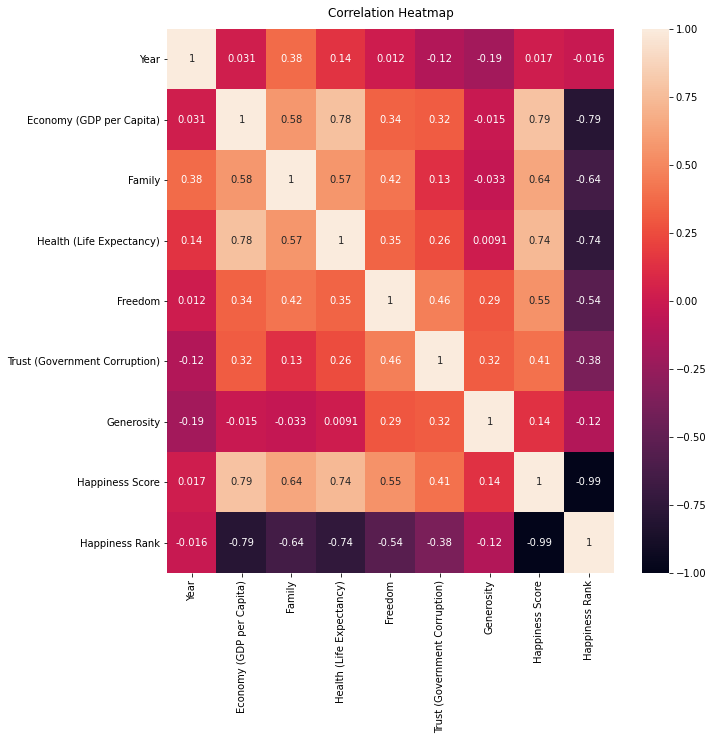

In [13]:
plt.figure(figsize=(10,10))
corr_mat = sns.heatmap(df_final.corr(), vmin=-1, vmax=1, annot=True)
corr_mat.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

_Se puede ver como la economía y salud (expectaitva de vida) impactan en la felicidad de las personas por su alta correlación. Por otro lado, la generosidad y la corrupción del gobierno son los factores que menos impacto tienen en la felicidad_

**Relación entre economía (GDP) y happiness score por región**

In [16]:
df_final['Region'].value_counts() #contamos cuantos datos por regiones hay 

Sub-Saharan Africa                 186
Central and Eastern Europe         144
Latin America and Caribbean        109
Western Europe                     103
Middle East and Northern Africa     96
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        28
North America                       10
Australia and New Zealand           10
Name: Region, dtype: int64

In [38]:
go.Figure(data=[go.Pie(labels=df_final.Region.value_counts().index, values=df_final.Region.value_counts().values)])

_**Asia**_

In [23]:
# combinamos todas las regiones de Asia
df_region_asia = df_final[df_final['Region'].isin(['Southeastern Asia', 'Eastern Asia','Southern Asia'])]
df_region_asia.head()

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
23,2015,Singapore,Southeastern Asia,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,6.798,24
33,2015,Thailand,Southeastern Asia,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,6.455,34
37,2015,Taiwan,Eastern Asia,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,6.298,38
45,2015,Japan,Eastern Asia,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,5.987,46
46,2015,South Korea,Eastern Asia,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,5.984,47


In [25]:
# graficamos el GDP de cada pais por año
fig = px.bar(data_frame=df_region_asia,
            x = 'Country',
            y = 'Economy (GDP per Capita)',
            color = 'Country',
            barmode='group',
            orientation= 'v',
            
            title='Economy per Capita para los países de Asia',
             
            animation_frame='Year', 
            range_y=[0,2],
             
            template='plotly_dark',
            text='Happiness Score'
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',
                 width = [0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]) # ancho de cada barra
fig.show()


_Esta gráfica demuestra que durante todos los años Singapore es el país con GDP más alto. Además aunque hapiness score entre algunos de los países es igual o bastante similar, no todos tienen el mismo GDP. Aunque los países en esta regien presenten las economías más altas, no tienen los happiness más altos_ 

_**África**_

In [26]:
# combinamos todas las regiones de África
df_region_africa = df_final[df_final['Region'].isin(['Sub-Saharan Africa', 'Middle East and Northern Africa'])]
df_region_africa.head()

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
10,2015,Israel,Middle East and Northern Africa,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,7.278,11
19,2015,United Arab Emirates,Middle East and Northern Africa,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,6.901,20
21,2015,Oman,Middle East and Northern Africa,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,6.853,22
27,2015,Qatar,Middle East and Northern Africa,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,6.611,28
34,2015,Saudi Arabia,Middle East and Northern Africa,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,6.411,35


In [33]:
# graficamos el GDP de cada pais por año
fig = px.bar(data_frame=df_region_africa,
            x = 'Country',
            y = 'Economy (GDP per Capita)',
            color = 'Country',
            barmode='group',
            orientation= 'v',
            
            title='Economy per Capita para los países de África',
             
            animation_frame='Year', 
            range_y=[0,2],
             
            template='plotly_dark',
            text='Happiness Score'
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',
                 width = [0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]) # ancho de cada barra
fig.show()

_En los países africanos si existe correlación entre el GDP y la felicidad ya que en los países con mayor GDP se presenta un happiness score más alto que en los países con GDP bajo_

_**Europa**_

In [35]:
# combinamos todas las regiones de Europa
df_region_europe = df_final[df_final['Region'].isin(['Western Europe', 'Central and Eastern Europe'])]
# graficamos el GDP de cada pais por año
fig = px.bar(data_frame=df_region_europe,
            x = 'Country',
            y = 'Economy (GDP per Capita)',
            color = 'Country',
            barmode='group',
            orientation= 'v',
            
            title='Economy per Capita para los países de Europa',
             
            animation_frame='Year', 
            range_y=[0,2],
             
            template='plotly_dark',
            text='Happiness Score'
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',
                 width = [0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]) # ancho de cada barra
fig.show()

_Luxembourg es el países con mayor GDP durante todos los años. En esta región no existe correlación del GDP con la felicidad. Swtizerland es el país con happiness score más alta y  su GDP es el tercero más alto_

**Relación entre Health (Life expectacy) y happiness score por región y país**

_**South Asia**_

In [40]:
fig = px.scatter(df_region_southasia,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                color = 'Country',
                
                facet_row = 'Year',
                labels ={"Happiness Score":"H Score"},
                template='plotly_dark',

                title = 'Health vs Happiness Score en South Asia'
                )

fig.show()

_Aunque Sri Lanka y Bangladesh sean los países con Health life expectancy más alta durante todos los años, sus happiness score no lo son. Los valores de felicidad están entre 4 y 5.
Por otro lado, Bhutan tiene el happiness score más alto aunque su Health life expectancy esté en un valor promedio_

_**Western Europa**_

In [43]:
t= df_region_europe[df_region_europe['Region']=='Western Europe']
t.Country.unique()
fig = px.scatter(df_region_europe,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                color = 'Country', 
                template='plotly_dark',
                facet_col = 'Year',
                facet_col_wrap = 5,
                labels ={"Health (Life Expectancy)":"Health"},
                title = 'Health vs Happiness Score en Western Europa',
                )
fig.show()

_Con este se puede ver la correlación entre la expectativa de vida y el happiness score en esta región del mundo_

In [47]:
df_region_europe1 = df_region_europe[df_region_europe['Country'].isin(['Switzerland', 
                                                                       'Norway','Finland','Netherlands',
                                                                      'Sweden', 'Austria'])] # seleccionamos los países con mayor happiness score
fig = px.scatter(df_region_europe1,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                color = 'Country',
                size = 'Economy (GDP per Capita)', 
                template='plotly_dark',
                facet_col = 'Year',
                facet_col_wrap = 5,
                labels ={"Health (Life Expectancy)":"Health"},
                title = 'Health vs Happiness Score en los países de Western European indicando su GDP con burbujas',
                )
fig.show()

_Esta gráfica demuestra la mejor de salud en Western Europa a lo largo del años. Austria es un claro ejemplo de que la felicidad aumenta conforme la salud lo hace, ya que la disminuciónde salud entre 2015 y 2017 produjo una disminución en el Happiness score._

_Finlandia es el país Europeo con el Happiness score más algo debido a que su salud ha sido mejorada constantemente. Se encontró que Sweitzerland tiene el mejor punteo de salud y GDP pero no su Happiness Score está resagado._

_**Central and Eastern Europa**_

In [48]:
df_region_europe2 = df_final[df_final['Region']=='Central and Eastern Europe'] 
fig = px.scatter(df_region_europe2,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                color = 'Country',
                size = 'Economy (GDP per Capita)', 
                template='plotly_dark',
                facet_col = 'Year',
                facet_col_wrap = 5,
                labels ={"Health (Life Expectancy)":"Health"},
                title = 'Health vs Happiness Score en Central and Eastern Europe indicando su GDP con burbujas',
                )
fig.show()

_Se demuestra que la Czech Republic presenta el happiness score más alto con un expectativa de vida promedio en constante aumento. Slovenia  tienen la salud más alta durante todos los años y tanto su GDP como happiness están arriba del promedio. El país con menor GDP es Tajikistan, cuya  happiness score aunque su su felicidad y life expectance ha aumentado a lo largo de los años._

_**Norte América**_

In [49]:
df_region_america = df_final[df_final['Region']=='North America'] 
fig = px.scatter(df_region_america,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                color = 'Country',
                template='plotly_dark',
                text = 'Year',
                size = 'Economy (GDP per Capita)',
                title = 'Health vs Happiness Score para Norte America indication su GDP con burbujas'
                )

fig.show()

_Canadá tiene mejor Happiness Score y Life Expectancy que USA posiblemente porque los servicios de salud en Canadá son gratuitos. Sin embargo, la felicidad diminuyó entre 2018 y 2019_

_**Países seleccionados**_

In [53]:
df_custom_countries = df_final[df_final['Country'].isin(['Switzerland', 'Norway',
                               'Austria', 'New Zealand',  'India', 'Bhutan',  'Israel',
                                'Bangladesh', 'Mauritius', 'Nigeria', 'Zambia', 'Czech Republic', 
                                'Uzbekistan', 'Slovakia','Canada', 'United States', 
                                'Poland', 'Turkmenistan', 'Costa Rica', 'Mexico', 'Brazil',
                                'Israel', 'United Arab Emirates', 
                                'Qatar', 'Saudi Arabia', 'Singapore', 'Thailand', 
                                'Philippines', 'Malaysia', 
                                'South Korea', 'Japan',  'Sri Lanka'
                                 ])] #se seleccionan los países
# se grafica happiness vs. health durante 2015-2019
fig = px.scatter(df_custom_countries,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                color = 'Country',
                size = 'Happiness Score', 
                template='plotly_dark',

                title = 'Health vs Happiness Score indicando su GDP con burbujas',
                animation_frame = 'Year',
                range_x = [-0.05,1.3], # define the x and y limit so that graph is not outbound.
                range_y = [2,9]
                #category_orders={'Year': [2015,2016,2017,2018,2019]},
                )

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000 #speed of change from one from to next frames.
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500 #speed of change in graph.

fig.show()

_En 2015, USA, Canadá y Norway presentan índices similares. Sin embargo, para 2019 USA a comparación con los otros dos países presentó un resago. Tanto su Life Expectancy como Happiness Lower fue menor que Canadá y Norway._

_Durante los 5 años Sri Lanka, Bangladesh , Bhutan y India tenían happiness score entre 3 y 5.5, con una diminusión mínima en 2016-2017 y un incremento gradual en 2018 en todos los países mencionados con anterioridad. Es decir que su movimeinto fue en conjunto_